In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVR, LinearSVR
from sklearn.metrics import mean_squared_error, r2_score
import time

df2 = pd.read_csv("TMDB_IMDB_Movies_Dataset.csv")

print("Dataset 2 shape:", df2.shape)

features2 = [
    "popularity", "vote_count", "release_date", "revenue",
    "runtime", "adult", "original_language", "genres"
]
target2 = "vote_average"

X2 = df2[features2].copy()
y2 = df2[target2].copy()

Dataset 2 shape: (433937, 13)


In [2]:
def preprocess_features(X):
    X = X.copy()

    # Convert date → year
    X["release_year"] = pd.to_datetime(
        X["release_date"], errors="coerce"
    ).dt.year
    X["release_year"].fillna(X["release_year"].median(), inplace=True)
    X.drop(columns=["release_date"], inplace=True)

    # Adult → int
    X["adult"] = X["adult"].astype(int)

    # Genres → first genre only
    X["genres"] = X["genres"].fillna("Unknown")
    X["genres"] = X["genres"].apply(
        lambda x: x.split(",")[0].strip() if isinstance(x, str) else "Unknown"
    )

    # Limit category size to top 5 (for speed!)
    for col in ["genres", "original_language"]:
        top = X[col].value_counts().index[:5]
        X[col] = X[col].apply(lambda v: v if v in top else "Other")

    # Identify column types
    categorical_cols = ["genres", "original_language", "adult"]
    numeric_cols = [c for c in X.columns if c not in categorical_cols]

    # One-hot + scale
    preprocessor = ColumnTransformer([
        ("onehot", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("scale", StandardScaler(), numeric_cols)
    ])

    return preprocessor.fit_transform(X)

# Process data
X2_processed = preprocess_features(X2)

print("Processed Dataset 2 shape:", X2_processed.shape)

C:\Users\vipra\AppData\Local\Temp\ipykernel_1792\3457730522.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X["release_year"].fillna(X["release_year"].median(), inplace=True)


Processed Dataset 2 shape: (433937, 19)


In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X2_processed, y2, test_size=0.2, random_state=42
)

C_list = [0.1, 1, 10]
gamma_list = ["scale", "auto"]
epsilon_list = [0.1, 0.01]

models = []
results = {}

start = time.time()

print("\n===== TRAINING SVM MODELS =====")

for C in C_list:
    for gamma in gamma_list:
        for eps in epsilon_list:

            name = f"SVR(C={C}, gamma={gamma}, eps={eps})"
            print(f"\nTraining {name}")

            model = SVR(
                kernel="rbf",
                C=C,
                gamma=gamma,
                epsilon=eps,
                max_iter=2000
            )

            model.fit(X_train, y_train)
            preds = model.predict(X_test)

            mse = mean_squared_error(y_test, preds)
            r2 = r2_score(y_test, preds)

            results[name] = (mse, r2)

            print(f"MSE: {mse:.4f} | R²: {r2:.4f}")

end = time.time()

print(f"\nTotal training time: {end - start:.2f} seconds")


===== TRAINING SVM MODELS =====

Training SVR(C=0.1, gamma=scale, eps=0.1)


c:\Users\vipra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


MSE: 11.7457 | R²: -0.1890

Training SVR(C=0.1, gamma=scale, eps=0.01)


c:\Users\vipra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


MSE: 11.7261 | R²: -0.1870

Training SVR(C=0.1, gamma=auto, eps=0.1)


c:\Users\vipra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


MSE: 11.7426 | R²: -0.1887

Training SVR(C=0.1, gamma=auto, eps=0.01)


c:\Users\vipra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


MSE: 11.7349 | R²: -0.1879

Training SVR(C=1, gamma=scale, eps=0.1)


c:\Users\vipra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


MSE: 11.2266 | R²: -0.1364

Training SVR(C=1, gamma=scale, eps=0.01)


c:\Users\vipra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


MSE: 11.0937 | R²: -0.1230

Training SVR(C=1, gamma=auto, eps=0.1)


c:\Users\vipra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


MSE: 11.1976 | R²: -0.1335

Training SVR(C=1, gamma=auto, eps=0.01)


c:\Users\vipra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


MSE: 11.1277 | R²: -0.1264

Training SVR(C=10, gamma=scale, eps=0.1)


c:\Users\vipra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


MSE: 10.1289 | R²: -0.0253

Training SVR(C=10, gamma=scale, eps=0.01)


c:\Users\vipra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


MSE: 11.6664 | R²: -0.1810

Training SVR(C=10, gamma=auto, eps=0.1)


c:\Users\vipra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


MSE: 9.6540 | R²: 0.0228

Training SVR(C=10, gamma=auto, eps=0.01)


c:\Users\vipra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


MSE: 9.9225 | R²: -0.0044

Total training time: 5007.79 seconds



===== BEST MODEL =====
SVR(C=10, gamma=auto, eps=0.1)
MSE: 9.654039780511663
R²: 0.022753374256748615


c:\Users\vipra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


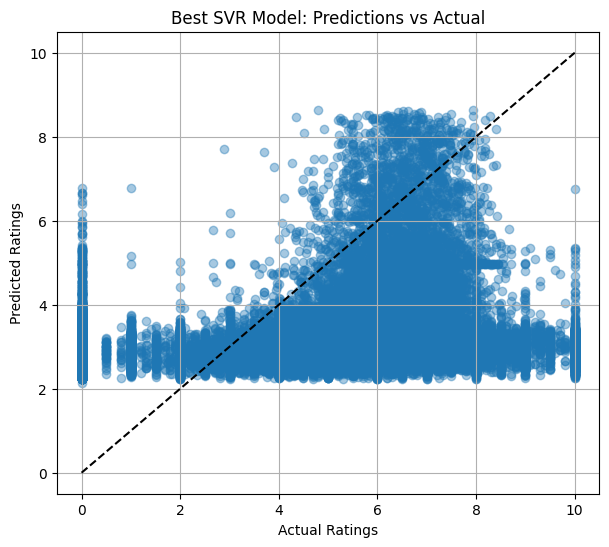

In [4]:
best_model = min(results, key=lambda k: results[k][0])
print("\n===== BEST MODEL =====")
print(best_model)
print("MSE:", results[best_model][0])
print("R²:", results[best_model][1])

best_preds = SVR(
    kernel="rbf",
    C=float(best_model.split("C=")[1].split(",")[0]),
    gamma=best_model.split("gamma=")[1].split(",")[0],
    epsilon=float(best_model.split("eps=")[1].split(")")[0]),
    max_iter=2000
)

best_preds.fit(X_train, y_train)
p = best_preds.predict(X_test)

plt.figure(figsize=(7, 6))
plt.scatter(y_test, p, alpha=0.4)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--")
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Best SVR Model: Predictions vs Actual")
plt.grid(True)
plt.show()